In [1]:
import sys
sys.path.append("../scripts_diy/")
from mcl_diy import *

In [8]:
class ResetMcl(Mcl):
    def __init__(self, envmap, init_pose, num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2},
                 distance_dev_rate=0.14, direction_dev=0.05,
                alpha_threshold=0.001):
        super().__init__(envmap, init_pose, num, motion_noise_stds, distance_dev_rate, direction_dev)
        self.alpha_threshold = alpha_threshold
        
    def random_reset(self):
        for p in self.particles:
            p.pose = np.array([np.random.uniform(-5.0, 5.0), no.random.uniform(-5.0, 5.0), np.random.uniform(-math.pi, math.pi)]).T
            p.weight = 1/len(self.particles)
        
    def observation_update(self, observation):
        for p in self.particles:
            p.observation_update(observation, self.map, self.distance_dev_rate, self.direction_dev)
            
        self.set_ml()
        
        if sum([p.weight for p in self.particles]) < self.alpha_threshold:
            self.random_reset()
        else:
            self.resampling()

<IPython.core.display.Javascript object>


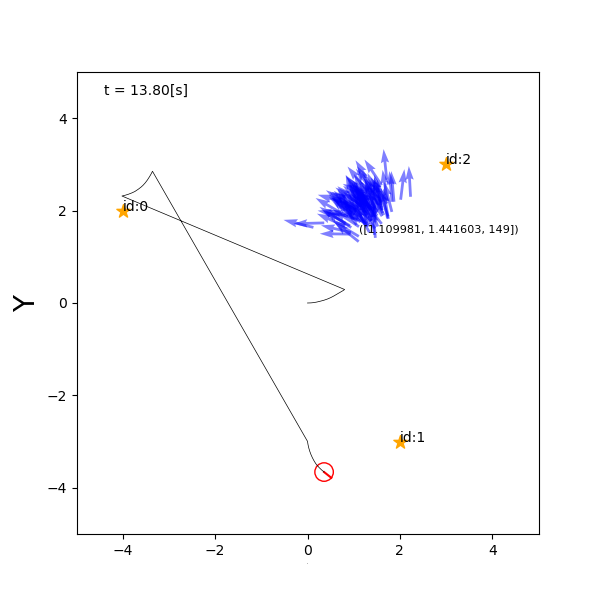

(array([0, 0, 0]), array([0, 0, 0]))

In [12]:
def trial(animation):
    time_interval = 0.1
    world = World(300, time_interval, debug=not animation) 

    ### 地図を生成して3つランドマークを追加 ###
    m = Map()                                  
    m.append_landmark(Landmark(-4,2))
    m.append_landmark(Landmark(2,-3))
    m.append_landmark(Landmark(3,3))
    world.append(m)          

    ### ロボットを作る ###
    initial_pose = np.array([0, 0, 0]).T
    pf = ResetMcl(m, initial_pose, 100)
    circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(initial_pose, sensor=Camera(m), agent=circling, expected_kidnap_time=10.0, color="red")
    world.append(r)

    world.draw()
    
    return (r.pose, pf.pose)

trial(True)

In [6]:
for num in pf.alphas: ###mclalpharesult
    print("landmarks:", num, "particles:", len(pf.particles), "min:", min(pf.alphas[num]), "max:", max(pf.alphas[num]))

landmarks: 2 particles: 100 min: 0.1372826616272812 max: 23.974182801862323
landmarks: 1 particles: 100 min: 0.014759673188371434 max: 6.596703930194473
landmarks: 0 particles: 100 min: 1.0000000000000007 max: 1.0000000000000007
